# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

### **Context:**
FoodHub is a food aggregator platform that connects users to a wide range of restaurants through a single mobile application. The app enables customers to place online orders, which are then received by the respective restaurants. A delivery partner assigned by FoodHub picks up the order from the restaurant after confirming the details and delivers it to the customer's specified location. Customers can rate their experience within the app. FoodHub generates revenue by charging a fixed commission on each delivery order placed through its platform.   

### **Objective:**
The Food Hub company maintains a record of various customer orders placed through their online platform. They aim to analyze this data to gain clear insights into the popularity and demand of different restaurants. This analysis will support them in improving customer satisfaction and enhancing overall business performance. Conduct a data analysis to assist the company in making informed decisions for business growth.




### Data Dictionary

The data includes various information related to food order.The detailed data dictionary is provided below

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether order is placed on weekdays or weekends(The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating : Rating given by the customer out of 5
* food_preparation_time: Time (in Minutes) taken by the restaurant to prepare the food.This is calculated by taking the difference between the timestamps of the restaurants order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in Minutes) taken by the delivery person to deliver the food package. this is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

### Let us start by importing the required libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# Connect to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data into pandas dataframe
data_foodHub = pd.read_csv('/content/drive/MyDrive/PythonPrograms/foodhub_order.csv')

In [ ]:
#looking at first 5 observations
data_foodHub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Find the shape of the dataset
data_foodHub.shape

(1898, 9)

#### Observations:
The dataset has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data_foodHub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


 #### Observations:


*   All columns contain 1,898 entries, suggesting that there are no missing values in the database.
*  The columns `restaurant_name`, `cuisine_type`, `day_of_the_week`, and `rating` are of data type 'object', while the remaining columns are numeric.
*  The object-type columns represent categorical data.
*  Although the rating column holds numerical information, it is currently stored as an object type and could be converted to a numeric format for better analysis

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values across each columns
data_foodHub.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No data is missing across any columns in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data_foodHub.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
Average = data_foodHub["food_preparation_time"].mean()
print('The avarage time taken to prepare the food(in Minutes)=', Average)

The avarage time taken to prepare the food(in Minutes)= 27.371970495258168


In [ ]:
print('The minimum time taken to prepare the food(in Minutes)=',min(data_foodHub["food_preparation_time"]))

The minimum time taken to prepare the food(in Minutes)= 20


In [ ]:
print('The maximum time taken to prepare the food(in Minutes)=',max(data_foodHub["food_preparation_time"]))


The maximum time taken to prepare the food(in Minutes)= 35


#### Observations:
*   Since order_id and customer_id are unique identifiers of the users who have ordered the food,interpreting its summary statisticks wont yield meanigful insights










### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data_foodHub['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
736 orders are not rated by customers.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### **Observations on cost of the order**

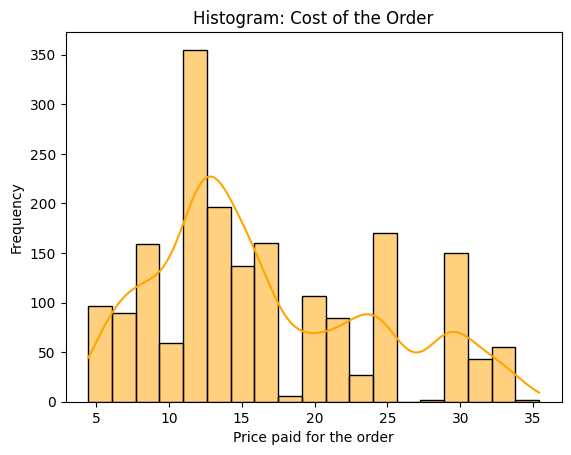

In [ ]:
plt.title('Histogram: Cost of the Order')
plt.xlabel('Price paid for the order')
plt.ylabel('Frequency')
sns.histplot(data=data_foodHub, x='cost_of_the_order',color='orange', kde='True');

*   TThe highest order is made for the price around $12.
*   The graph is right skewed

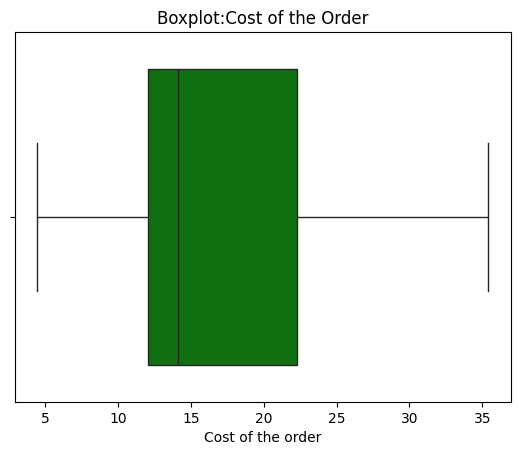

In [ ]:
plt.title('Boxplot:Cost of the Order')
plt.xlabel('Cost of the order')
sns.axes_style('whitegrid')
sns.boxplot(data=data_foodHub, x='cost_of_the_order',color='green');

Observations:
*   There are no outliers for the cost
*   50% of the orders placed between 12 to 23 dollars
*   75% of the orders cost less than around 23 dollars
*   25% of the orders cost below 12 dollars
*   Median cost of the order is around 14 dollars

#### **Observations on Rating**

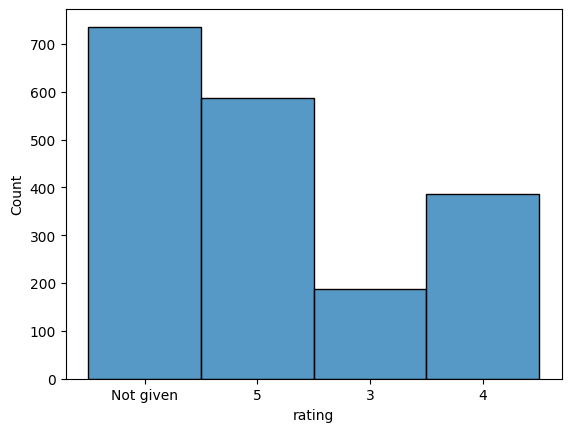

In [ ]:
sns.histplot(data=data_foodHub, x='rating');

Observations:
*   Over 700+ deliveries have not received any customer feedback
*   Majority of received ratings are 4 and 5 (out of 5), showing high customer satisfaction



#### **Observations on food preparation time**

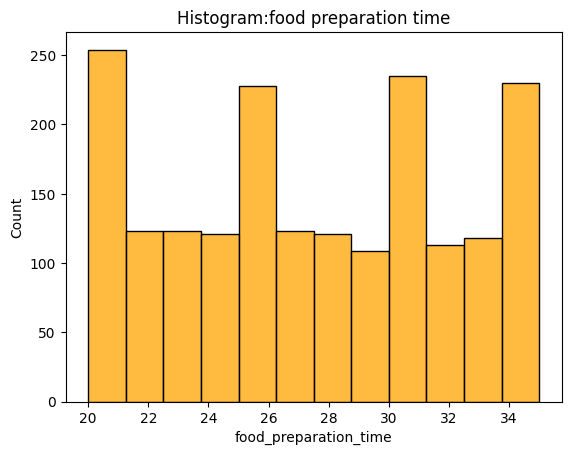

In [ ]:
plt.title('Histogram:food preparation time')
sns.histplot(data=data_foodHub, x='food_preparation_time',color='orange');

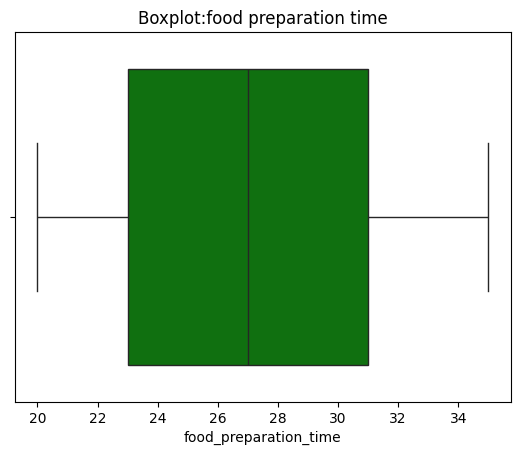

In [ ]:
plt.title('Boxplot:food preparation time')
sns.boxplot(data=data_foodHub, x='food_preparation_time',color='green');

*   There are no outliers on both the ends.
*   50% of the orders have food preparation times ranging from 23 to 31 minutes
*   25% of the orders have food preparation time less than 23 Minutes
*   75% of the orders have food preparation time less than 31 Minutes



#### **Observations on delivery time**

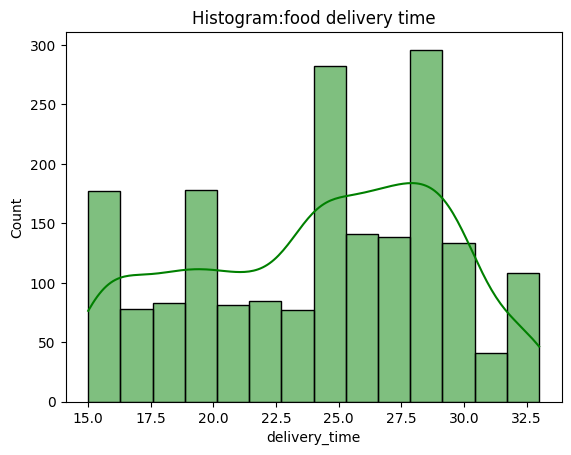

In [ ]:
plt.title('Histogram:food delivery time')
sns.histplot(data=data_foodHub, x='delivery_time',color='green', kde='True');

Obeservations:

*   The graph for delivery time is slightly left skewed




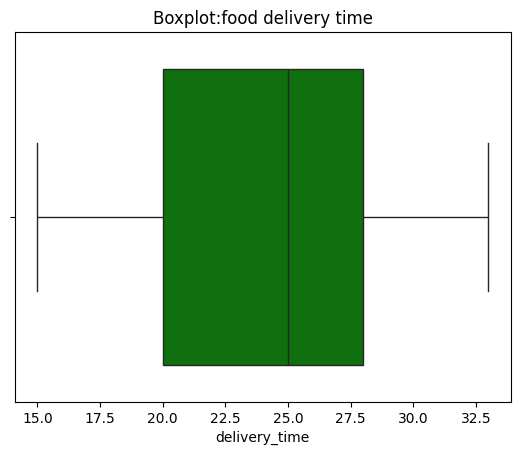

In [ ]:
plt.title('Boxplot:food delivery time')
sns.boxplot(data=data_foodHub, x='delivery_time',color='green');


*   There are no outliers in the delivery time.
*   The 50% of Delivery time lies between 20 to 28 Minutes
*   The 25% of the orders take delivery time less than 20 minutes
*   The 75% of the orders take delivery time less than 28 minutes


#### **Observations on Cuisine Type**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

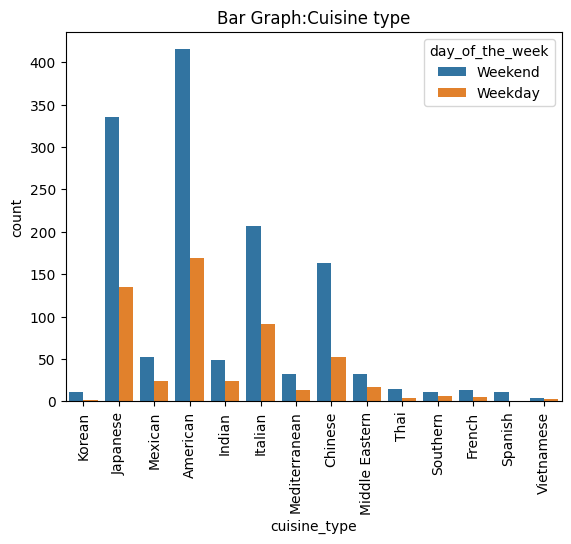

In [ ]:
plt.title('Bar Graph:Cuisine type')
sns.countplot(data=data_foodHub, x='cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90)

Observatios:
*   Most popular cuisine is 'American' followed by 'Japanese', 'Italian' and 'Chinese' on both weekday and weekend


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

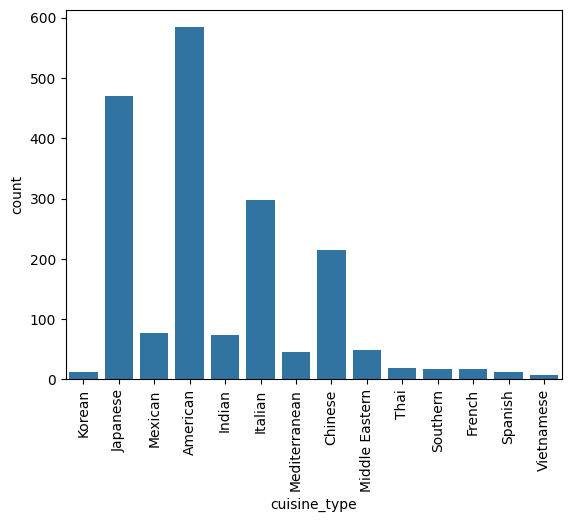

In [ ]:
sns.countplot(data=data_foodHub, x='cuisine_type');
plt.xticks(rotation=90)



*   'American' cuisine has got highest orders nearly 600
*   'Japanese' cuisine has got 2nd highest orders around 480+



#### **Observations on Restaurant Name**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


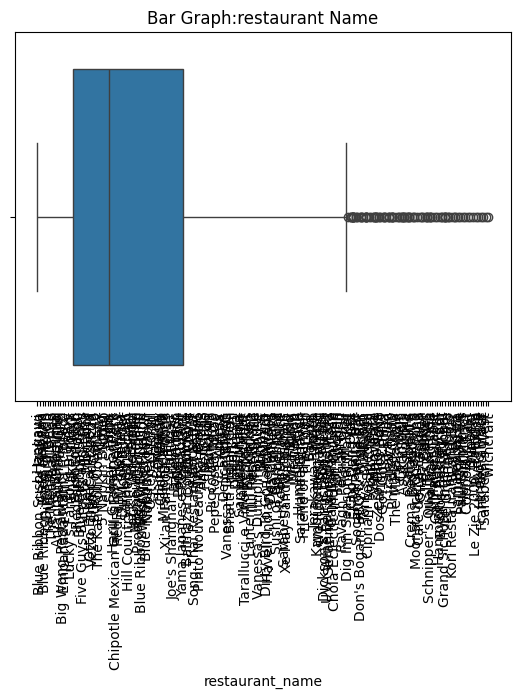

In [ ]:
plt.title('Bar Graph:restaurant Name')
sns.boxplot(data=data_foodHub, x='restaurant_name');
plt.xticks(rotation=90)
plt.show()



*   Restaurant has outliers on upper whisker side



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


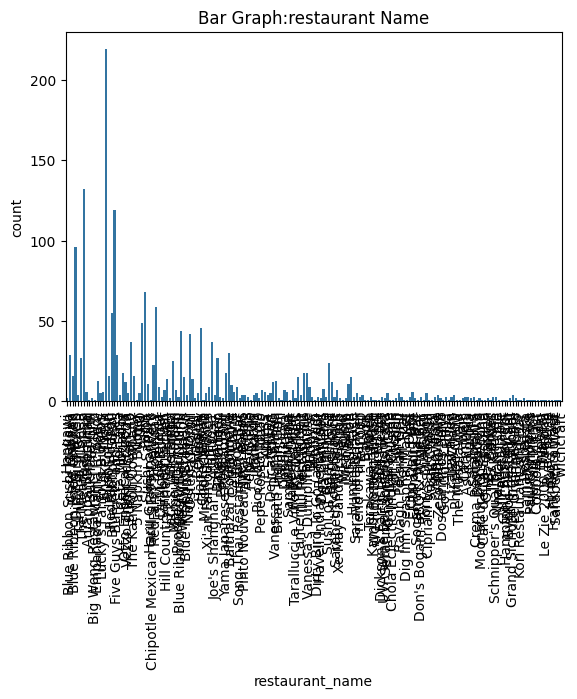

In [ ]:
plt.title('Bar Graph:restaurant Name')
sns.countplot(data=data_foodHub, x='restaurant_name');
plt.xticks(rotation=90)
plt.show()

#### **Observations on Day of the week**

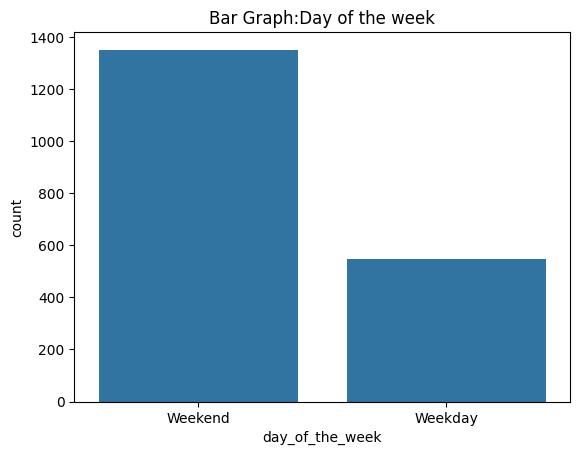

In [ ]:
plt.title('Bar Graph:Day of the week')
sns.countplot(data=data_foodHub, x='day_of_the_week');

Observation:

*   More than 1200  orders placed on weekend.
*   Nearly 600 orders are placed on weekday.
*   More orders placed on weekend than weekday.



#### **Observations on Customer ID and Order ID**

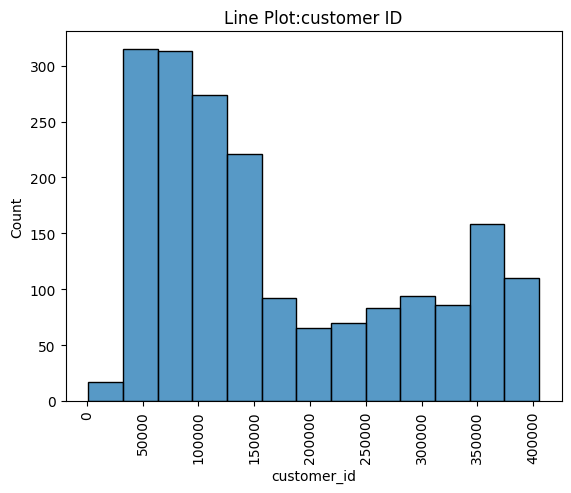

In [ ]:
plt.title('Line Plot:customer ID')
sns.histplot(data = data_foodHub , x = 'customer_id');
plt.xticks(rotation=90)
plt.show()



*   The graph is right skewed
*   The customer ID's betweeen 50000 to 150000 have ordered to the most compared to other customers



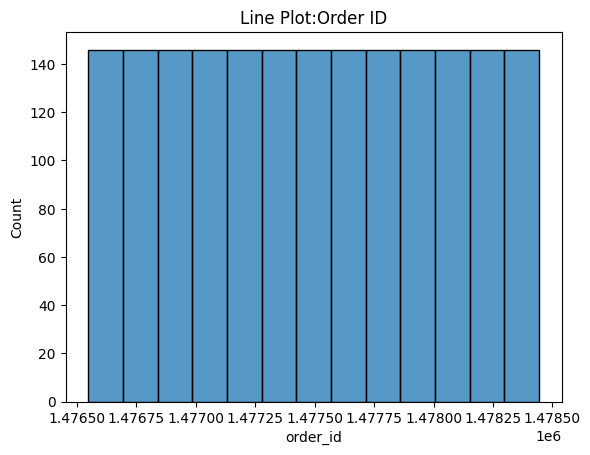

In [ ]:
plt.title('Line Plot:Order ID')
#plt.figure(figsize = (15,7))
sns.histplot(data = data_foodHub , x='order_id');
#plt.xticks(rotation=90)
plt.show()

Order ID are unique value given to the order hence doesnt yield much valuable information

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

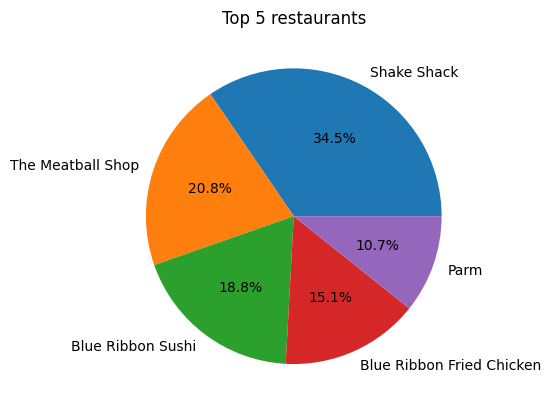

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [ ]:
data_foodHub['restaurant_name'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title('Top 5 restaurants')
plt.ylabel('')
plt.show()
print(data_foodHub['restaurant_name'].value_counts().head(5))

#### Observations:

The restaurant `Shake Shak` received the highest number of orders with a total of 219, making it the most popular restaurant in the dataset. It is followed by `The Meatball Shop` with 132 orders, `Blue Ribbon Sushi` with 119, `Blue Ribbon Fried Chicken` with 96, and `Parm` in fifth place with 68 orders.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

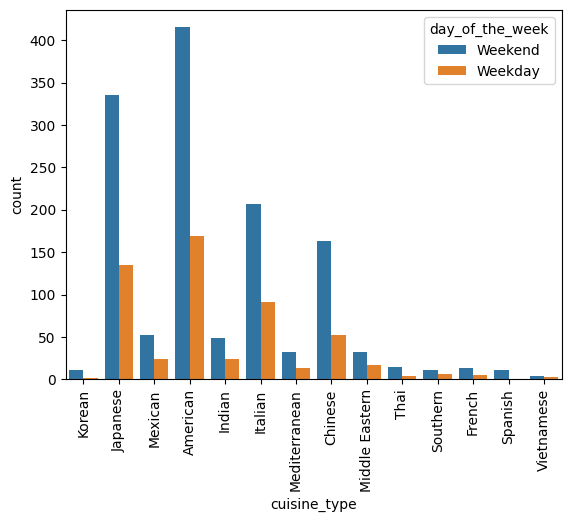

In [ ]:
sns.countplot(data=data_foodHub, x= 'cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)

#### Observations:
From above plot its clear that the most popular cuisine on weekend is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
orders_over_20=0
for cost in data_foodHub['cost_of_the_order']:
    if cost > 20:
      orders_over_20 +=1

Total_orders = data_foodHub['cost_of_the_order'].count()
percentage_over_20 = (orders_over_20/Total_orders)*100
print(f"Percentage of orders over $20: {percentage_over_20:.2f}%")

Percentage of orders over $20: 29.24%


#### Observations:
Percentage of orders over $20: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
Mean_Delivery_Time = data_foodHub['delivery_time'].mean()
print('Mean order delivery time(in minutes) =', Mean_Delivery_Time)

Mean order delivery time(in minutes) = 24.161749209694417


#### Observations:
Mean order delivery Time is 24.16 Minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# list of customer orders
orders = data_foodHub['customer_id']

# Initialize empty dictionary
order_counts = {}

# Count how many orders each customer placed
for customer_id in orders:
    if customer_id in order_counts:
        order_counts[customer_id] += 1  # Increment count
    else:
        order_counts[customer_id] = 1   # Initialize with 1

# Convert dictionary to list of (customer_id, count) pairs
order_list = list(order_counts.items())

# Sort the list by count in descending order
order_list_sorted = sorted(order_list, key=lambda x: x[1], reverse=True)

# Get the top 3 customers
top_3_customers = order_list_sorted[:3]

# Print the result
print("Top 3 most frequent customers:")
for customer_id, count in top_3_customers:
    print(f"Customer ID: {customer_id}, Orders: {count}")

Top 3 most frequent customers:
Customer ID: 52832, Orders: 13
Customer ID: 47440, Orders: 10
Customer ID: 83287, Orders: 9


#### Observations:
Top 3 most frequent customers:

1.   Customer ID: 52832, Orders: 13
2.   Customer ID: 47440, Orders: 10
3.   Customer ID: 83287, Orders: 9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


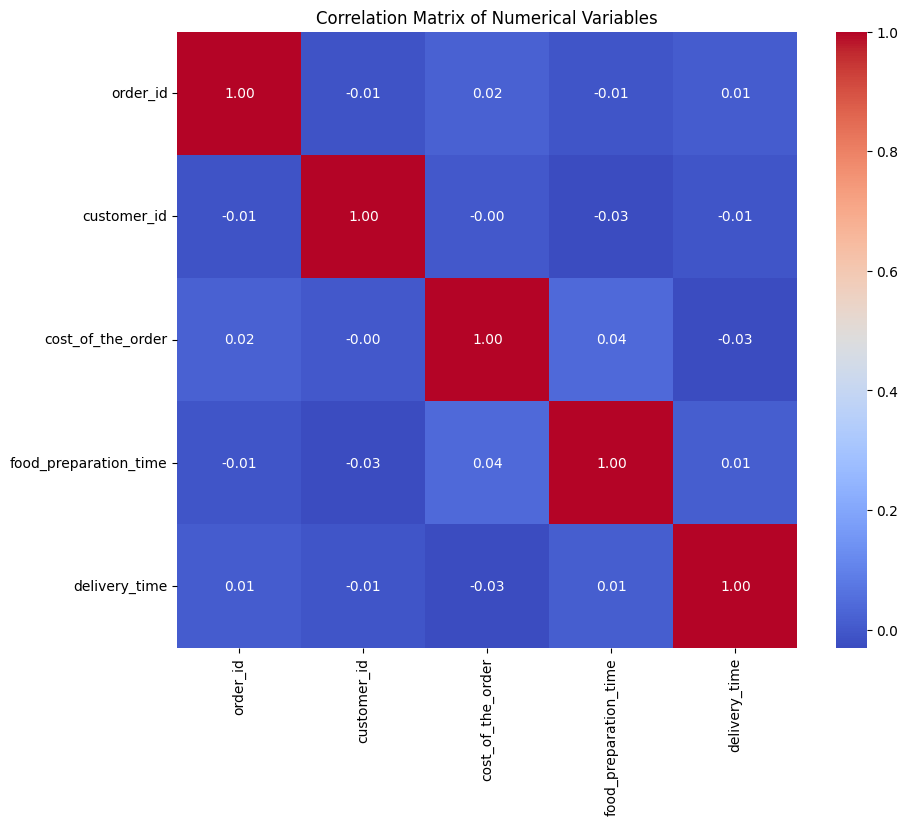

In [ ]:
numerical_cols = data_foodHub.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data_foodHub[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


# Observations:
 - There is a very weak positive correlation between `cost_of_the_order` and `food_preparation_time` (0.04).
 - There is a weak positive correlation between `food_preparation_time` and `delivery_time` (0.01).
 - There are no strong linear relationships between the numerical variables.

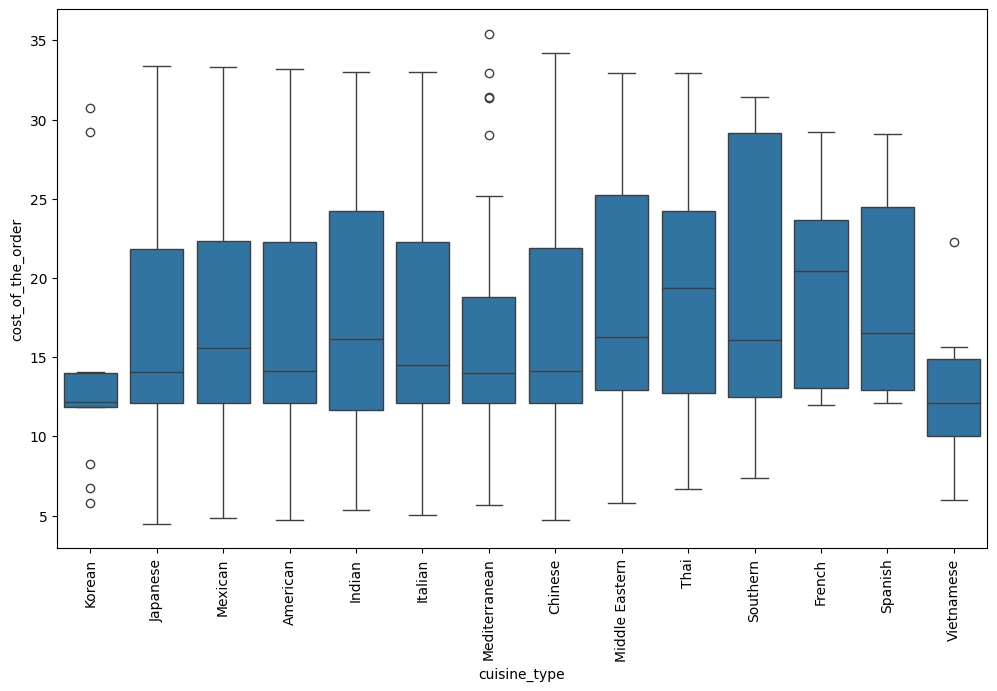

In [ ]:
# Numerical vs Categorical
# Cost of the order vs Cuisine type
plt.figure(figsize=(12, 7))
sns.boxplot(data=data_foodHub, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()


# Observations:
 - Some cuisine types like 'French'and 'Thai' seem to have higher median order costs compared to others.
 - 'Meditereramen' and 'Vietnamese' cuisine has some higher-cost outliers.
 - 'Southern' cuisine has a wide range of order costs
 - 'Korean' cuisine has a narrow range of order costs, including some hier and lower outlies

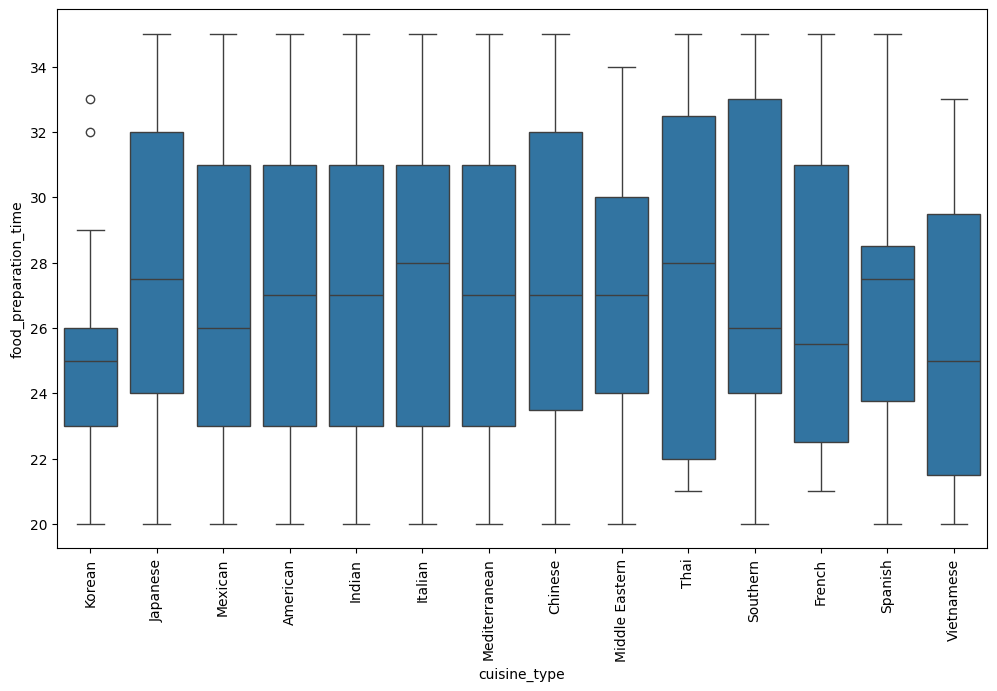

In [ ]:
# Food preparation time vs Cuisine type
plt.figure(figsize=(12, 7))
sns.boxplot(data=data_foodHub, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()


# Observations:
 - Food preparation time distribution seems relatively similar across most cuisine types.
 - 'Japanese', 'Italian' and 'Thai' cuisines appear to have slightly higher median preparation times.

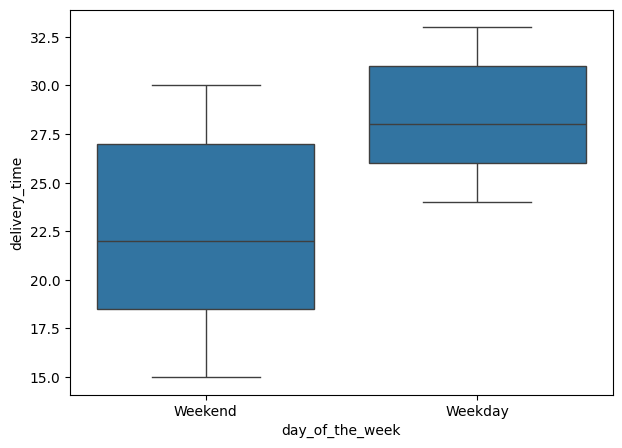

In [ ]:
# Delivery time vs Day of the week
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_foodHub, x='day_of_the_week', y='delivery_time')
plt.show()


# Observations:
- Delivery times appear to be slightly higher on weekend compared to weekdays, likely due to increased order volume.

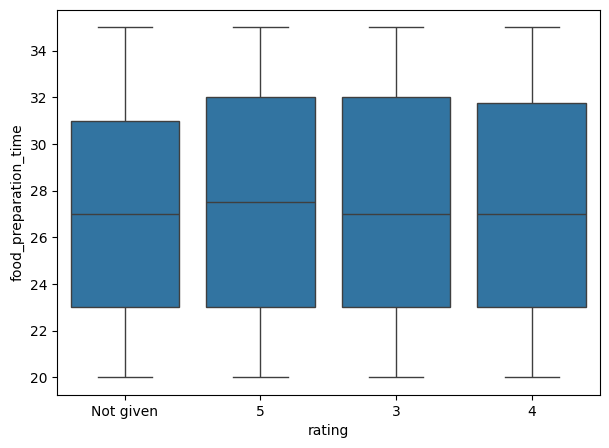

In [ ]:
# Rating vs Food preparation time
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_foodHub, x='rating', y='food_preparation_time')
plt.show()


# Observations:
 - There doesn't appear to be a strong correlation between the food preparation time and the customer rating. Orders with varying preparation times receive different ratings.


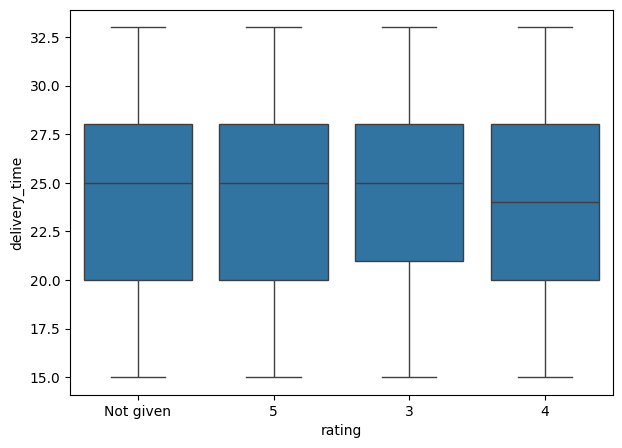

In [ ]:
# Rating vs Delivery time
plt.figure(figsize=(7, 5))
sns.boxplot(data=data_foodHub, x='rating', y='delivery_time')
plt.show()


# Observations:
 - Similar to preparation time, there isn't a clear strong relationship between delivery time and customer rating. While customers might expect faster delivery, longer delivery times don't consistently lead to lower ratings. The distribution of delivery times is quite similar across different rating categories.


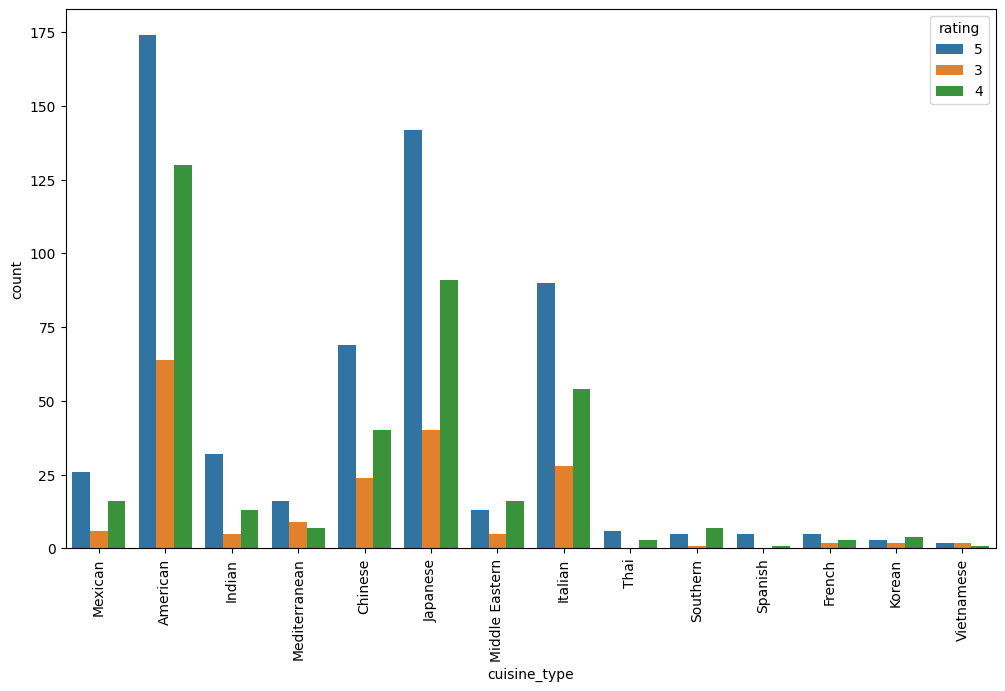

In [ ]:
# Cuisine type vs Rating (consider only rated orders)
plt.figure(figsize=(12, 7))
sns.countplot(data=data_foodHub[data_foodHub['rating'] != 'Not given'], x='cuisine_type', hue='rating')
plt.xticks(rotation=90)
plt.show()


# Observations:
 - For most popular cuisines ('American', 'Japanese', 'Italian', 'Chinese'), 5-star ratings are the most frequent among the rated orders.
 - This reinforces the observation from univariate analysis that overall customer satisfaction is high.


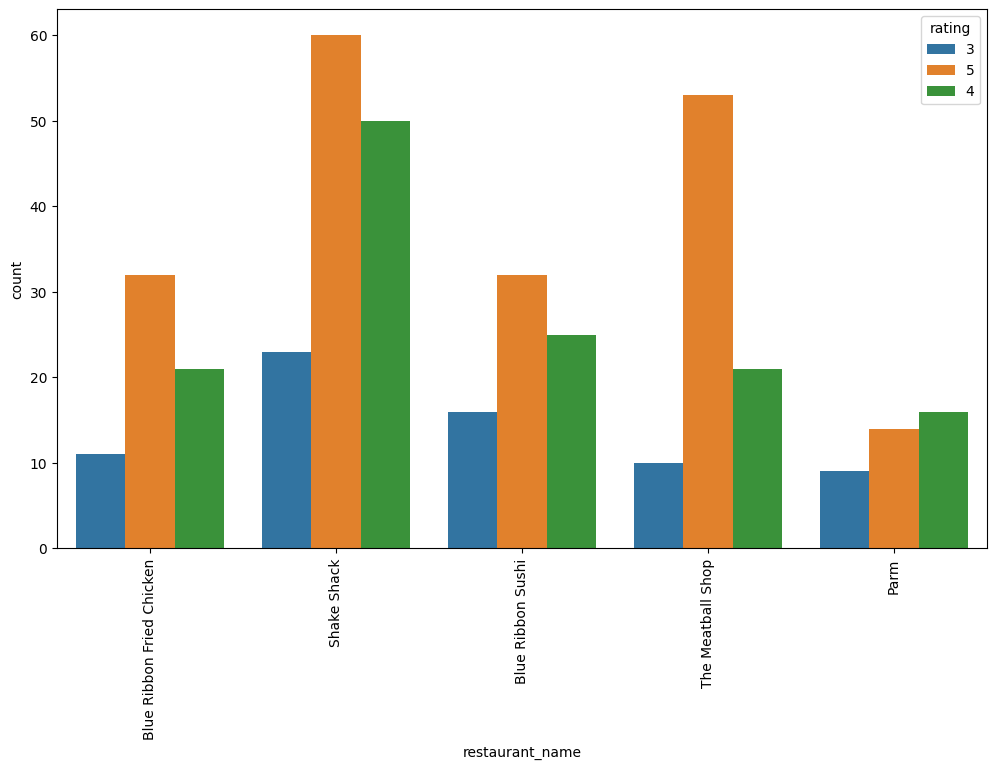

In [ ]:
# Restaurant name vs Rating (consider only rated orders and top restaurants)
top_restaurants = data_foodHub['restaurant_name'].value_counts().head(5).index.tolist()
plt.figure(figsize=(12, 7))
sns.countplot(data=data_foodHub[(data_foodHub['rating'] != 'Not given') & (data_foodHub['restaurant_name'].isin(top_restaurants))], x='restaurant_name', hue='rating')
plt.xticks(rotation=90)
plt.show()


# Observations:
 - Among the top 5 restaurants, 'Shake Shak' and 'The Meatball Shop' have a significant number of 5-star ratings.
 - This further supports the popularity and high satisfaction levels for these restaurants.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Step 1: Replace entries where ratings are "Not given" with nan values
data_foodHub['rating'] = data_foodHub['rating'].replace('not given', np.nan)

# Step 2: Convert ratings to numeric
data_foodHub['rating'] = pd.to_numeric(data_foodHub['rating'], errors='coerce')

# Step 3: Drop the rows which has not valid ratings
valid_ratings = data_foodHub.dropna(subset=['rating'])

# Step 4: Count the ratings for each restaurant
rating_counts = valid_ratings.groupby('restaurant_name')['rating'].count()

# Step 5: Find the avarage rating for each Restaurant
avg_ratings = valid_ratings.groupby('restaurant_name')['rating'].mean()

# Step 6: Find the eligible restaurants with raing count>50 avarage rating >4
eligible = rating_counts[(rating_counts > 50) & (avg_ratings > 4).reindex(rating_counts.index)].index

# Print the result
print("Restaurants eligible for promotional offer:", eligible)


Restaurants eligible for promotional offer: Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')


#### Observations:
The Restaurants eligible for the offer: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack','The Meatball Shop'


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0
data_foodHub['revenue'] = data_foodHub['cost_of_the_order'].apply(calculate_revenue)
Total_revenue = data_foodHub['revenue'].sum()
print('The total revenue generated by the company across all orders(in dollars) =', Total_revenue)

The total revenue generated by the company across all orders(in dollars) = 6166.303


#### Observations:
The total revenue generated by the company across all orders(in dollars) = 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Step 1: Calculate total delivery time
data_foodHub['total_delivery_time'] = data_foodHub['food_preparation_time'] + data_foodHub['delivery_time']

# Step 2: Calculate percentage of orders with total time > 60 minutes
total_orders = len(data_foodHub['total_delivery_time'])
orders_over_60 = len(data_foodHub[data_foodHub['total_delivery_time'] > 60])
percentage_over_60 = (orders_over_60 / total_orders) * 100

# Step 3: Print result
print(f"Percentage of orders that take more than 60 minutes: {percentage_over_60:.2f}%")

Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:
Percentage of orders that take more than 60 minutes: 10.54%. Its quite low indicating that there are less orders from the far away places.Company has to come up with the startegy to increase the order from far places.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Step 1: Group by 'day_of_the_week' and calculate mean delivery time
mean_delivery_times = data_foodHub.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Step 2: Print results
print("Mean delivery time (in minutes) for weekdays and weekends:")
print(mean_delivery_times)

Mean delivery time (in minutes) for weekdays and weekends:
  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


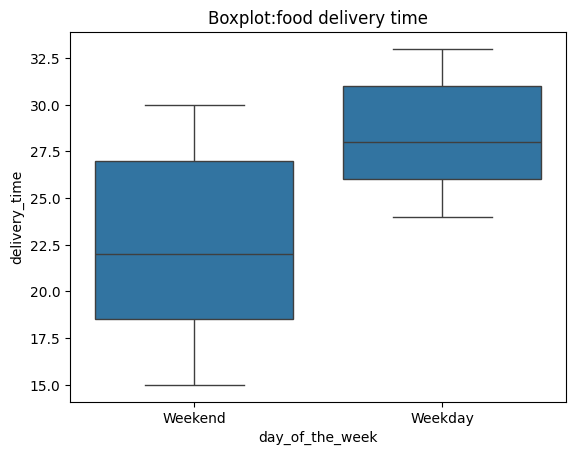

In [ ]:
sns.boxplot(data=data_foodHub, x='day_of_the_week',y='delivery_time');

### Conclusion and Recommendations
*   Mean delivery time on weekday is greater than weekend
1.   Weekday      28.340037
2.    Weekend      22.470022

*  Even Boxplot shows the same

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Based on the analysis of the FoodHub data, we can draw the following conclusions:

- The dataset contains 1898 orders with no missing values across various attributes, including order details, restaurant and cuisine information, time metrics, and customer ratings.
- The majority of orders are placed on weekends, indicating higher customer activity during this period.
- The average cost of an order is around $16.

- A significant number of orders (736) have not received a rating. However, among the rated orders, the majority (over 700) have a rating of 4 or 5, suggesting a high level of customer satisfaction for those who provide feedback.
- The most popular cuisine type is American, followed by Japanese, Italian, and Chinese. These cuisines are also the most popular on weekends.
- The top 5 restaurants in terms of order volume are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

- Approximately 29% of orders cost more than $20.

- The average food preparation time is around 27 minutes, and the average delivery time is around 24 minutes.
- There is no strong linear correlation between numerical variables like cost, preparation time, and delivery time.
- Delivery times are slightly higher on weekdays compared to weekends.
- There is no clear strong relationship between food preparation time or delivery time and customer ratings.
- Among the rated orders, the most popular cuisines and top restaurants show a high frequency of 5-star ratings.
- Restaurants eligible for promotional offers based on a rating count of over 50 and an average rating greater than 4 are: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', and 'The Meatball Shop'.
- The total revenue generated by the company across all orders is approximately $6166.
- Approximately 10.54% of orders take more than 60 minutes for total delivery time (preparation + delivery).


### Recommendations:

Based on the analysis, here are some recommendations to help improve the business:

1.  **Focus on Increasing Rating Engagement:** A large number of orders are unrated. FoodHub should implement strategies to encourage customers to provide feedback. This could include:
    *   In-app notifications or prompts after delivery.
    *   Small incentives (e.g., a minor discount on the next order) for providing a rating.
    *   Making the rating process simpler and faster within the app.
    Increasing the number of ratings will provide more comprehensive insights into customer satisfaction and help identify areas for improvement across more restaurants and cuisine types.

2.  **Leverage the Popularity of Top Cuisines and Restaurants:**
    *   Given the popularity of American, Japanese, Italian, and Chinese cuisines, FoodHub could partner with more restaurants offering these cuisines, especially in areas where they are less represented.
    *   Promote the top-performing restaurants ('Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop') more prominently within the app and through marketing campaigns, highlighting their high ratings.
    *   Offer exclusive deals or promotions with these high-rated restaurants to attract more customers.

3.  **Analyze Unrated Orders for Potential Issues:** While the rated orders show high satisfaction, the unrated orders might include customers who had negative experiences but didn't leave a rating. FoodHub should investigate patterns in unrated orders, such as longer delivery times, issues with specific restaurants, or types of orders, to identify potential problems.

4.  **Explore Strategies for Weekday Orders:** Although weekends have higher order volume, FoodHub should explore ways to increase orders during weekdays. This could involve:
    *   Targeted weekday promotions or discounts.
    *   Partnerships with restaurants popular for weekday lunches or dinners.
    *   Highlighting restaurants with faster preparation and delivery times for busy weekday schedules.

5.  **Investigate Longer Delivery Times:** While the percentage of orders taking over 60 minutes is low, these long delivery times can significantly impact customer experience. FoodHub should analyze the reasons behind these longer times, such as:
    *   Distance between the restaurant and customer.
    *   Traffic conditions.
    *   Efficiency of delivery partners.
    *   Preparation time for specific types of orders.
    Identifying and addressing the root causes of lengthy deliveries can help improve the overall customer experience, especially for customers located further away.

6.  **Utilize Rating Data for Restaurant Partnerships:** When onboarding new restaurants, FoodHub should consider the potential for high ratings based on factors like cuisine type and past performance of similar restaurants. Additionally, provide feedback and support to restaurants that have lower ratings to help them improve.

By implementing these recommendations, FoodHub can gain deeper insights into customer preferences, improve operational efficiency, enhance customer satisfaction, and ultimately drive business growth.